In [1]:
from pydataxm import *                          
import datetime as dt
import pandas as pd
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
#show all columns and rows
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
#stop warnings
import warnings
warnings.filterwarnings('ignore')
objetoAPI = pydataxm.ReadDB()

df = objetoAPI.get_collections()
#filter where Entity is 'Recurso'
df = df[df['Entity'] == 'Recurso']

df

,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
8,ConsCombustibleMBTU,Consumo Combustible MBTU por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,MBTU,Los generadores térmicos deben reportar diaria...
9,Gene,Generación por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,kWh,Generacion neta de cada una de las plantas Nac...
10,IndRecMargina,Indicador Recurso Margina por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,#,Si Precio de Oferta Declarado = Máximo Precio ...
12,PrecOferDesp,Precio de Oferta de Despacho por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,COP/kWh,Es el precio de la energia de un recurso de ge...
20,GeneIdea,Generación Ideal por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,kWh,Despacho de generacion que resulta de consider...
25,EmisionesCO2Eq,Emisiones de CO2 Eq por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,gCO2e/kWh,Emisiones totales de Dióxido de Carbono. Para ...
34,GeneSeguridad,Generación de Seguridad por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,kWh,Generación que se requiere para garantizar con...
35,GeneFueraMerito,Generación Fuera de Mérito por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,kWh,Generación forzada requerida para suplir las R...
37,GeneProgDesp,Generación Programada por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,kWh,Despacho de generacion esperado de las central...
38,GeneProgRedesp,Generación Programada Redespacho por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,kWh,Generación programada del redespacho


# Getting data from Listado_Recursos_Generacion.xlsx and sorting it per type
## Just fill in the year in the block below and then it will gather all the data trough the api, a full year takes 7-8 minutes to download

In [2]:
df_generation_plants = pd.read_excel('Listado_Recursos_Generacion.xlsx',skiprows=3)
df_hydro_plants = df_generation_plants[df_generation_plants['Tipo Generación']=='HIDRAULICA']
df_solar_plants = df_generation_plants[df_generation_plants['Tipo Generación']=='SOLAR']
df_wind_plants = df_generation_plants[df_generation_plants['Tipo Generación']=='EOLICA']
df_thermal_plants = df_generation_plants[df_generation_plants['Tipo Generación']=='TERMICA']
df_cogen_plants = df_generation_plants[df_generation_plants['Tipo Generación']=='COGENERADOR']


plants_hydro = {}
plants_solar = {}
plants_wind = {}
plants_thermal = {}
plants_cogen = {}
plants = {}
for i, row in df_generation_plants.iterrows():
    plants[row['Código SIC']] = row['Nombre Recurso']

for i, row in df_hydro_plants.iterrows():
    plants_hydro[row['Código SIC']] = row['Nombre Recurso']

for i, row in df_solar_plants.iterrows():
    plants_solar[row['Código SIC']] = row['Nombre Recurso']

for i, row in df_wind_plants.iterrows():
    plants_wind[row['Código SIC']] = row['Nombre Recurso']

for i, row in df_thermal_plants.iterrows():
    plants_thermal[row['Código SIC']] = row['Nombre Recurso']

for i, row in df_cogen_plants.iterrows():
    plants_cogen[row['Código SIC']] = row['Nombre Recurso']

columnnames_hydro = list(plants_hydro.keys()).append('Timestamp')
columnnames_solar = list(plants_solar.keys()).append('Timestamp')
columnnames_wind = list(plants_wind.keys()).append('Timestamp')
columnnames_thermal = list(plants_thermal.keys()).append('Timestamp')
columnnames_cogen = list(plants_cogen.keys()).append('Timestamp')


print("All:  ",len(plants))
print("Hydro:  ",len(plants_hydro))
print("Solar:  ",len(plants_solar))
print("Wind:  ",len(plants_wind))
print("Thermal:  ",len(plants_thermal))
print("Cogen:  ",len(plants_cogen))



All:   339
Hydro:   167
Solar:   51
Wind:   3
Thermal:   99
Cogen:   19


In [3]:
print(plants_cogen)

{'3AL8': 'INGENIO MARIA LUISA', '2UP2': 'COGENERADOR MANUELITA 2', '2SXQ': 'BIOENERGY', '2SXS': 'COGENERADOR PROENCA II', 'MAN1': 'INGENIO MANUELITA', 'PNC1': 'COGENERADOR PROENCA 1', 'CIS1': 'INGENIO SAN CARLOS 1', 'PIC1': 'INGENIO PICHICHI 1', 'CGM1': 'MAYAGUEZ 1', 'ILC1': 'INGENIO LA CARMELITA', 'CIP1': 'INGENIO PROVIDENCIA 2', 'PPN1': 'PAPELES NACIONALES', 'CLTJ': 'COGENERADOR COLTEJER 1', 'CTMO': 'CENTRAL TUMACO 1', 'RPL1': 'INGENIO RIOPAILA 1', 'CAS1': 'CENTRAL CASTILLA 1', 'IRG1': 'INGENIO RISARALDA 1', 'INC1': 'INCAUCA 1', 'BIOE': 'COGENERADOR BIOAISE 1'}


In [9]:
#MONTHLY MERGE IS NOT RIGHT YET
#CHECK APPEND METHOD IN THERMAL
#CHECK MERGE WITH DEFINITIVE THERMAL
#CHECK IF DF.RESET NEEDS TO BE DONE AFTER THE GLOBAL VARIABLES?

# https://saturncloud.io/blog/how-to-merge-two-pandas-time-series-objects-with-different-date-time-indices/#:~:text=If%20the%20two%20time%20series,included%20in%20the%20merged%20dataset.

import concurrent.futures
def process_data(index, start_time, solar, wind, hydro, thermal, cogen, definitive_thermal, definitive_solar, definitive_wind, definitive_hydro, definitive_cogen, objetoAPI):
    # global start_time, solar, wind, hydro, thermal, cogen, definitive_thermal, definitive_solar, definitive_wind, definitive_hydro, definitive_cogen, objetoAPI
    # global thermal, definitive_thermal, objetoAPI, start_time
    difference = dt.datetime.now() - start_time
    if difference.seconds > 600:
        print("reset connection")
        objetoAPI = pydataxm.ReadDB()
        start_time = dt.datetime.now()  # Reset timer
    else:
        pass
    
    print("Done months:", index, " of ", len(start_list))
    start_date = start_list[index]
    end_date = end_list[index]
    
    df_plant = objetoAPI.request_data("Gene", "Recurso", start_date.date(), end_date.date())
    solar = solar.append(df_plant[df_plant['Values_code'].isin(list(plants_solar.keys()))])
    solar.fillna(0, inplace=True)
    wind = wind.append(df_plant[df_plant['Values_code'].isin(list(plants_wind.keys()))])
    wind.fillna(0, inplace=True)
    hydro = hydro.append(df_plant[df_plant['Values_code'].isin(list(plants_hydro.keys()))])
    hydro.fillna(0, inplace=True)
    thermal = thermal.append(df_plant[df_plant['Values_code'].isin(list(plants_thermal.keys()))])
    thermal.fillna(0, inplace=True)
    cogen = cogen.append(df_plant[df_plant['Values_code'].isin(list(plants_cogen.keys()))])
    cogen.fillna(0, inplace=True)

    # thermal['Values_code'] = thermal['Values_code'].replace(plants_thermal)
    # thermal.drop(['Id'], axis=1, inplace=True)

    for i in thermal['Values_code'].unique():
        temp_thermal = thermal[thermal['Values_code'] == i].copy()
        temp_thermal = pd.melt(temp_thermal, id_vars=['Date'], value_vars=[f'Values_Hour{i:02d}' for i in range(1, 24)], var_name='Hour', value_name=i)
        temp_thermal['Timestamp'] = pd.to_datetime(temp_thermal['Date']) + pd.to_timedelta(temp_thermal['Hour'].str.split('Hour').str[-1].astype(int), unit='h')
        temp_thermal.drop(columns=['Date', 'Hour'], inplace=True)
        temp_thermal.rename(columns={'Values_code': i}, inplace=True)
        for j in definitive_thermal.columns:
            if j not in temp_thermal.columns:
                temp_thermal[j] = 0
        temp_thermal.set_index('Timestamp', inplace=True)
        if definitive_thermal.empty:
            definitive_thermal = temp_thermal
        else:
            definitive_thermal = pd.concat([definitive_thermal, temp_thermal], axis=0)
            definitive_thermal.sort_values(by=['Timestamp'], inplace=True)

    for i in solar['Values_code'].unique():
        temp_solar = solar[solar['Values_code'] == i].copy()
        temp_solar = pd.melt(temp_solar, id_vars=['Date'], value_vars=[f'Values_Hour{i:02d}' for i in range(1, 24)], var_name='Hour', value_name=i)
        temp_solar['Timestamp'] = pd.to_datetime(temp_solar['Date']) + pd.to_timedelta(temp_solar['Hour'].str.split('Hour').str[-1].astype(int), unit='h')
        temp_solar.drop(columns=['Date', 'Hour'], inplace=True)
        temp_solar.rename(columns={'Values_code': i}, inplace=True)
        for j in definitive_thermal.columns:
            if j not in temp_solar.columns:
                temp_solar[j] = 0
        temp_solar.set_index('Timestamp', inplace=True)
        if definitive_solar.empty:
            definitive_solar = temp_solar
        else:
            definitive_solar = pd.concat([definitive_solar, temp_solar], axis=0)
            definitive_solar.sort_values(by=['Timestamp'], inplace=True)

    for i in wind['Values_code'].unique():
        temp_wind = wind[wind['Values_code'] == i].copy()
        temp_wind = pd.melt(temp_wind, id_vars=['Date'], value_vars=[f'Values_Hour{i:02d}' for i in range(1, 24)], var_name='Hour', value_name=i)
        temp_wind['Timestamp'] = pd.to_datetime(temp_wind['Date']) + pd.to_timedelta(temp_wind['Hour'].str.split('Hour').str[-1].astype(int), unit='h')
        temp_wind.drop(columns=['Date', 'Hour'], inplace=True)
        temp_wind.rename(columns={'Values_code': i}, inplace=True)
        for j in definitive_thermal.columns:
            if j not in temp_wind.columns:
                temp_wind[j] = 0
        temp_wind.set_index('Timestamp', inplace=True)
        if definitive_wind.empty:
            definitive_wind = temp_wind
        else:
            definitive_wind = pd.concat([definitive_wind, temp_wind], axis=0)
            definitive_wind.sort_values(by=['Timestamp'], inplace=True)
    
    for i in hydro['Values_code'].unique():
        temp_hydro = hydro[hydro['Values_code'] == i].copy()
        temp_hydro = pd.melt(temp_hydro, id_vars=['Date'], value_vars=[f'Values_Hour{i:02d}' for i in range(1, 24)], var_name='Hour', value_name=i)
        temp_hydro['Timestamp'] = pd.to_datetime(temp_hydro['Date']) + pd.to_timedelta(temp_hydro['Hour'].str.split('Hour').str[-1].astype(int), unit='h')
        temp_hydro.drop(columns=['Date', 'Hour'], inplace=True)
        temp_hydro.rename(columns={'Values_code': i}, inplace=True)
        for j in definitive_hydro.columns:
            if j not in temp_hydro.columns:
                temp_hydro[j] = 0
        temp_hydro.set_index('Timestamp', inplace=True)
        if definitive_hydro.empty:
            definitive_hydro = temp_hydro
        else:
            definitive_hydro = pd.concat([definitive_hydro, temp_hydro], axis=0)
            definitive_hydro.sort_values(by=['Timestamp'], inplace=True)
    
    for i in cogen['Values_code'].unique():
        temp_cogen = cogen[cogen['Values_code'] == i].copy()
        temp_cogen = pd.melt(temp_cogen, id_vars=['Date'], value_vars=[f'Values_Hour{i:02d}' for i in range(1, 24)], var_name='Hour', value_name=i)
        temp_cogen['Timestamp'] = pd.to_datetime(temp_cogen['Date']) + pd.to_timedelta(temp_cogen['Hour'].str.split('Hour').str[-1].astype(int), unit='h')
        temp_cogen.drop(columns=['Date', 'Hour'], inplace=True)
        temp_cogen.rename(columns={'Values_code': i}, inplace=True)
        for j in definitive_cogen.columns:
            if j not in temp_cogen.columns:
                temp_cogen[j] = 0
        temp_cogen.set_index('Timestamp', inplace=True)
        if definitive_cogen.empty:
            definitive_cogen = temp_cogen
        else:
            definitive_cogen = pd.concat([definitive_cogen, temp_cogen], axis=0)
            definitive_cogen.sort_values(by=['Timestamp'], inplace=True)


# Start timer
start_time = dt.datetime.now()

solar = pd.DataFrame()
wind = pd.DataFrame()
hydro = pd.DataFrame()
thermal = pd.DataFrame()
cogen = pd.DataFrame()

# df_list = [solar, wind, hydro, thermal, cogen]

change_variable = False
definitive_thermal = pd.DataFrame(columns = columnnames_thermal)
definitive_solar = pd.DataFrame(columns = columnnames_solar)
definitive_wind = pd.DataFrame(columns = columnnames_wind)
definitive_hydro = pd.DataFrame(columns = columnnames_hydro)
definitive_cogen = pd.DataFrame(columns = columnnames_cogen)




months = 67
start_year = 2018
start_date = dt.datetime(start_year, 1, 1)
start_list = [start_date + relativedelta(months=i) for i in range(0, months)] 
end_list = [start_date + relativedelta(months=i+1, days=-1) for i in range(0, months)]
# Create a thread pool
objetoAPI = pydataxm.ReadDB()
max_threads = 8 
with concurrent.futures.ThreadPoolExecutor(max_threads) as executor:
    print('Thread')
    for index, start in enumerate(start_list):
        #only do from index 33
        if 11 >= index >= 22:
            executor.map(process_data(index, start_time, solar, wind, hydro, thermal, cogen, definitive_thermal, definitive_solar, definitive_wind, definitive_hydro, definitive_cogen, objetoAPI), range(len(start_list)))
        elif index < 11:
            print("Done already: ",index)
        else:
            print("Later: ",index)


#set nan to 0
definitive_solar.fillna(0, inplace=True)
definitive_wind.fillna(0, inplace=True)
definitive_hydro.fillna(0, inplace=True)
definitive_thermal.fillna(0, inplace=True)
definitive_cogen.fillna(0, inplace=True)

#add a total production column
definitive_solar['Total[kW]'] = definitive_solar.sum(axis=1)
definitive_wind['Total[kW]'] = definitive_wind.sum(axis=1)
definitive_hydro['Total[kW]'] = definitive_hydro.sum(axis=1)
definitive_thermal['Total[kW]'] = definitive_thermal.sum(axis=1)
definitive_cogen['Total[kW]'] = definitive_cogen.sum(axis=1)

definitive_production_df_list = [definitive_solar, definitive_wind, definitive_hydro, definitive_thermal, definitive_cogen]
definitive_thermal.head()


Thread
Done already:  0
Done already:  1
Done already:  2
Done already:  3
Done already:  4
Done already:  5
Done already:  6
Done already:  7
Done already:  8
Done already:  9
Done already:  10
Later:  11
Later:  12
Later:  13
Later:  14
Later:  15
Later:  16
Later:  17
Later:  18
Later:  19
Later:  20
Later:  21
Later:  22
Later:  23
Later:  24
Later:  25
Later:  26
Later:  27
Later:  28
Later:  29
Later:  30
Later:  31
Later:  32
Later:  33
Later:  34
Later:  35
Later:  36
Later:  37
Later:  38
Later:  39
Later:  40
Later:  41
Later:  42
Later:  43
Later:  44
Later:  45
Later:  46
Later:  47
Later:  48
Later:  49
Later:  50
Later:  51
Later:  52
Later:  53
Later:  54
Later:  55
Later:  56
Later:  57
Later:  58
Later:  59
Later:  60
Later:  61
Later:  62
Later:  63
Later:  64
Later:  65
Later:  66


,Total[kW]


In [5]:
#ONLY RUN IF CODE ABOVE IS INTERRUPTED

#set nan to 0
definitive_solar.fillna(0, inplace=True)
definitive_wind.fillna(0, inplace=True)
definitive_hydro.fillna(0, inplace=True)
definitive_thermal.fillna(0, inplace=True)
definitive_cogen.fillna(0, inplace=True)

#add a total production column
definitive_solar['Total[kW]'] = definitive_solar.sum(axis=1)
definitive_wind['Total[kW]'] = definitive_wind.sum(axis=1)
definitive_hydro['Total[kW]'] = definitive_hydro.sum(axis=1)
definitive_thermal['Total[kW]'] = definitive_thermal.sum(axis=1)
definitive_cogen['Total[kW]'] = definitive_cogen.sum(axis=1)

definitive_production_df_list = [definitive_solar, definitive_wind, definitive_hydro, definitive_thermal, definitive_cogen]
definitive_thermal.head()

,Total[kW]


In [6]:
definitive_solar

,Total[kW]


In [16]:
definitive_wind

,JPR1,2S6Q,2S6S,2S8I,2S8S,2S9Q,2U8Y,2U91,2U93,2V25,...,TSR1,TDR1,2W4Y,TEC1,2WFN,2XXR,2Y2T,2XXX,2YB9,Total[kW]
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-12-01 01:00:00,5669.40,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5669.40
2018-12-01 01:00:00,5669.40,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5669.40
2018-12-01 01:00:00,5669.40,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5669.40
2018-12-01 01:00:00,5669.40,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5669.40
2018-12-01 01:00:00,5669.40,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5669.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-30 19:00:00,4391.35,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4391.35
2019-11-30 20:00:00,2528.47,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2528.47
2019-11-30 21:00:00,1718.22,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1718.22


In [17]:
definitive_hydro.head()

,2QBW,2QRL,2QV2,2R22,2S6U,2S78,2S8N,2S8U,2SDR,2SI1,...,JBV1,AMR1,SJN1,BLM1,IQU2,SJM1,HMIN,2WC5,INT1,Total[kW]
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-12-01 01:00:00,19956.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19956.34
2018-12-01 01:00:00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52414.90
2018-12-01 01:00:00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19700.00
2018-12-01 01:00:00,0.00,0.0,19087.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19087.20
2018-12-01 01:00:00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,694847.05


,2S6Q,2S6S,2S8I,2S8S,2S9Q,2U8Y,2U91,2U93,2V25,2V27,...,TSR1,TDR1,2W4Y,TEC1,2WFN,2XXR,2Y2T,2XXX,2YB9,Total[kW]
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-12-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2018-12-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2018-12-01 01:00:00,0.0,0.0,0.0,0.0,0.0,19178.88,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19178.88
2018-12-01 01:00:00,0.0,0.0,10080.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10080.00
2018-12-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


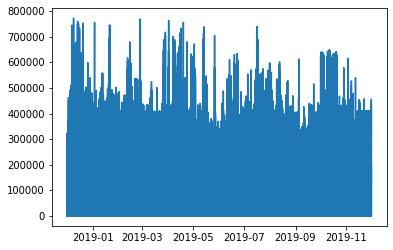

In [18]:
plt.plot(definitive_thermal['Total[kW]'])
definitive_thermal.head()

In [20]:
definitive_cogen

,2SXQ,2UP2,CGM1,CIP1,CIS1,CLTJ,ILC1,INC1,IRG1,PIC1,PNC1,RPL1,CAS1,PPN1,Total[kW]
Timestamp,,,,,,,,,,,,,,,
2018-12-01 01:00:00,14776.72,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,14776.72
2018-12-01 01:00:00,0.00,0.0,0.0,0.0,0.00,424.6,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,424.60
2018-12-01 01:00:00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,309.0,0.0,0.0,0.0,0.0,309.00
2018-12-01 01:00:00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,309.0,0.0,0.0,0.0,0.0,309.00
2018-12-01 01:00:00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,7178.4,0.00,0.0,0.0,0.0,0.0,0.0,7178.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-31 23:00:00,0.00,6948.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,6948.00
2019-10-31 23:00:00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,15787.75,0.0,0.0,0.0,0.0,0.0,15787.75
2019-10-31 23:00:00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,15048.0,0.0,0.0,0.0,15048.00


No handles with labels found to put in legend.


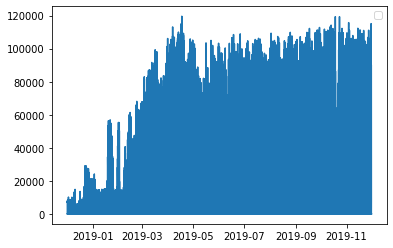

No handles with labels found to put in legend.


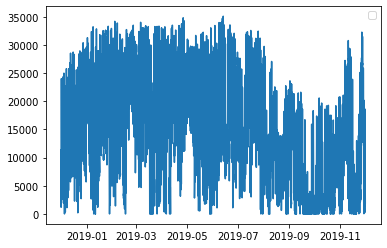

No handles with labels found to put in legend.


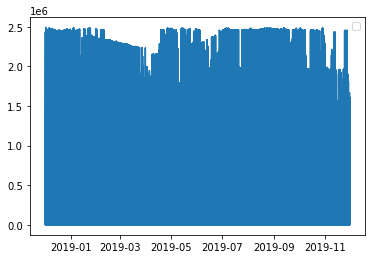

No handles with labels found to put in legend.


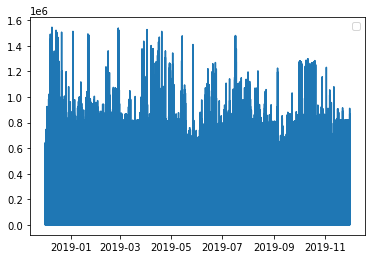

No handles with labels found to put in legend.


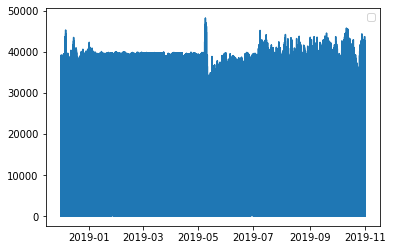

In [21]:


#add a total production column
definitive_solar['Total[kW]'] = definitive_solar.sum(axis=1)
definitive_wind['Total[kW]'] = definitive_wind.sum(axis=1)
definitive_hydro['Total[kW]'] = definitive_hydro.sum(axis=1)
definitive_thermal['Total[kW]'] = definitive_thermal.sum(axis=1)
definitive_cogen['Total[kW]'] = definitive_cogen.sum(axis=1)

definitive_production_df_list = [definitive_solar, definitive_wind, definitive_hydro, definitive_thermal, definitive_cogen]
definitive_thermal.head()

for df in definitive_production_df_list:
    plt.plot(df.index, df['Total[kW]'])
    plt.legend()
    plt.show()

# solar, wind, hydro, thermal, cogen


In [22]:
# export all definitive_production_df_list df's to csv
# solar, wind, hydro, thermal, cogen
for i in range(len(definitive_production_df_list)):
    print(i)
    if i == 0:
        type = 'solar'
    elif i == 1:
        type = 'wind'
    elif i == 2:
        type = 'hydro'
    elif i == 3:
        type = 'thermal'
    elif i == 4:
        type = 'cogen'
    definitive_production_df_list[i].to_csv('definitive_production_df_list_'+type+'_'+str(start_year)+'_23_33m.csv') #november and december lacking from 2019




0
1
2
3
4


No handles with labels found to put in legend.


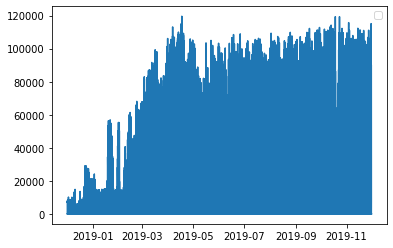

No handles with labels found to put in legend.


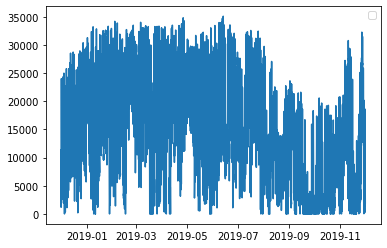

No handles with labels found to put in legend.


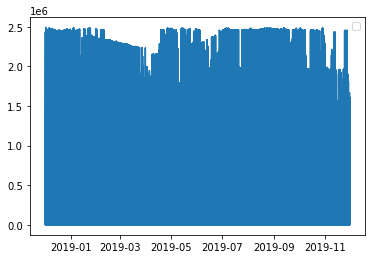

No handles with labels found to put in legend.


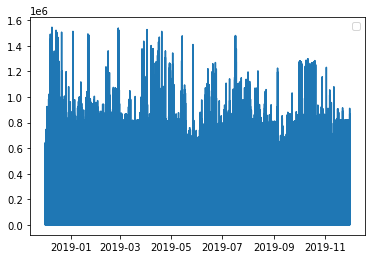

No handles with labels found to put in legend.


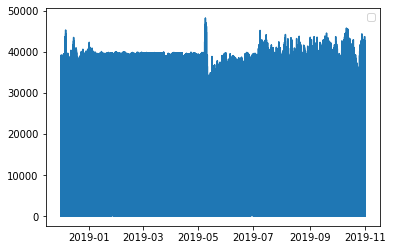

In [23]:
for df in definitive_production_df_list:
    plt.plot(df.index, df['Total[kW]'])
    #print df name of df
    # print(df)
    
    plt.legend()
    plt.show()

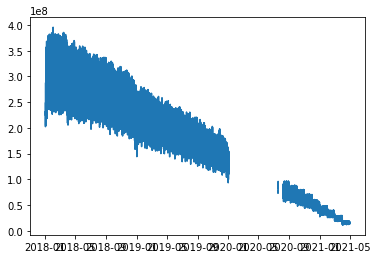

In [13]:
#combine total of all plants
definitive_total = pd.DataFrame()
for df in definitive_production_df_list:
    if definitive_total.empty:
        definitive_total = df['Total[kW]']
    else:
        definitive_total = definitive_total + df['Total[kW]']
#plot definitive_total
plt.plot(definitive_total.index, definitive_total)

In [84]:
import numpy as np
#show all rows and columns
possible_columnnames = ['Timestamp','value_one', 'value_two', 'value_three']
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_test_1 = pd.DataFrame(columns=possible_columnnames)

#add 3 columns with one showing the datetime for the next 3 hours
df_test_1['Timestamp'] = pd.date_range('2020-01-01', periods=24, freq='H')
# add a column named value_one with random values between 0 and 100
df_test_1['value_one'] = np.random.randint(0, 100, size=(24))
# add a column named value_two with random values between 100 and 200
df_test_1['value_two'] = np.random.randint(0, 100, size=(24))


# df_test_2 = pd.DataFrame()
df_test_2 = pd.DataFrame(columns=possible_columnnames)
#add 3 columns with one showing the datetime for the next 3 hours
df_test_2['Timestamp'] = pd.date_range('2020-01-02', periods=24, freq='H')
# add a column named value_one with random values between 0 and 100
df_test_2['value_one'] = np.random.randint(100, 200, size=(24))
# add a column named value_two with random values between 100 and 200
df_test_2['value_two'] = np.random.randint(100, 200, size=(24))

# df_test_3 = pd.DataFrame()
df_test_3 = pd.DataFrame(columns=possible_columnnames)
#add 3 columns with one showing the datetime for the next 3 hours
df_test_3['Timestamp'] = pd.date_range('2020-01-03', periods=24, freq='H')
df_test_3['value_two'] = np.random.randint(200, 300, size=(24))
df_test_3['value_three'] = np.random.randint(200, 300, size=(24))
df_test_1 = df_test_1.set_index('Timestamp')
df_test_1 = df_test_1.fillna(0)
df_test_2 = df_test_2.set_index('Timestamp')
df_test_2 = df_test_2.fillna(0)
df_test_3 = df_test_3.set_index('Timestamp')
df_test_3 = df_test_3.fillna(0)

print(df_test_1.head(24))
print(df_test_2.head(24))
print(df_test_3.head(24))

                     value_one  value_two  value_three
Timestamp                                             
2020-01-01 00:00:00         43         88            0
2020-01-01 01:00:00         46         63            0
2020-01-01 02:00:00         86         49            0
2020-01-01 03:00:00         59         90            0
2020-01-01 04:00:00         60         32            0
2020-01-01 05:00:00         40         23            0
2020-01-01 06:00:00         94         11            0
2020-01-01 07:00:00         13         14            0
2020-01-01 08:00:00         56         84            0
2020-01-01 09:00:00         95         43            0
2020-01-01 10:00:00         25         57            0
2020-01-01 11:00:00         14         63            0
2020-01-01 12:00:00         79         35            0
2020-01-01 13:00:00         47         84            0
2020-01-01 14:00:00          7         10            0
2020-01-01 15:00:00         13         61            0
2020-01-01

In [86]:
df_test = pd.concat([df_test_1, df_test_2, df_test_3], axis=0)
df_test.head(72)

,value_one,value_two,value_three
Timestamp,,,
2020-01-01 00:00:00,43,88,0
2020-01-01 01:00:00,46,63,0
2020-01-01 02:00:00,86,49,0
2020-01-01 03:00:00,59,90,0
2020-01-01 04:00:00,60,32,0
2020-01-01 05:00:00,40,23,0
2020-01-01 06:00:00,94,11,0
2020-01-01 07:00:00,13,14,0
2020-01-01 08:00:00,56,84,0


In [42]:
df_test_3.head(24)


,Timestamp,value_two,value_three
0,2020-01-03 00:00:00,249,248
1,2020-01-03 01:00:00,293,274
2,2020-01-03 02:00:00,262,288
3,2020-01-03 03:00:00,246,216
4,2020-01-03 04:00:00,285,213
5,2020-01-03 05:00:00,246,244
6,2020-01-03 06:00:00,200,267
7,2020-01-03 07:00:00,276,208
8,2020-01-03 08:00:00,232,273
9,2020-01-03 09:00:00,275,246


In [43]:
# df_test = df_test.append(df_test_3)
df_test = df_test.merge(df_test_3, on='Timestamp', how='outer')
df_test = df_test.reset_index()
df_test.head(72)

,level_0,index,Timestamp,value_one_x,value_two_x,value_one_y,value_two_y,value_two_x,value_three_x,value_two_y,value_three_y
0,0,0,2020-01-01 00:00:00,98.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2020-01-01 01:00:00,92.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2020-01-01 02:00:00,78.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,2020-01-01 03:00:00,73.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,2020-01-01 04:00:00,96.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
5,5,5,2020-01-01 05:00:00,55.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN
6,6,6,2020-01-01 06:00:00,52.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
7,7,7,2020-01-01 07:00:00,40.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN
8,8,8,2020-01-01 08:00:00,66.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
9,9,9,2020-01-01 09:00:00,80.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN
